<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A.-Products,-Strategies-and-Pricing" data-toc-modified-id="A.-Products,-Strategies-and-Pricing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>A. Products, Strategies and Pricing</a></span></li><li><span><a href="#B.-Portfolio-Optimisation" data-toc-modified-id="B.-Portfolio-Optimisation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>B. Portfolio Optimisation</a></span><ul class="toc-item"><li><span><a href="#Covariance-Matrix" data-toc-modified-id="Covariance-Matrix-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Covariance Matrix</a></span></li><li><span><a href="#Optimisation---Tangency-Portfolio" data-toc-modified-id="Optimisation---Tangency-Portfolio-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Optimisation - Tangency Portfolio</a></span><ul class="toc-item"><li><span><a href="#Solve-optimization-by-Lagrangian-method." data-toc-modified-id="Solve-optimization-by-Lagrangian-method.-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Solve optimization by Lagrangian method.</a></span></li><li><span><a href="#Standard-deviation-of-optimal-portfolio." data-toc-modified-id="Standard-deviation-of-optimal-portfolio.-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Standard deviation of optimal portfolio.</a></span></li><li><span><a href="#On-a-graph-identifying-this-optimal-portfolio." data-toc-modified-id="On-a-graph-identifying-this-optimal-portfolio.-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>On a graph identifying this optimal portfolio.</a></span></li></ul></li><li><span><a href="#Optimisation---Global-Minimum-Variance-Portfolio" data-toc-modified-id="Optimisation---Global-Minimum-Variance-Portfolio-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Optimisation - Global Minimum Variance Portfolio</a></span><ul class="toc-item"><li><span><a href="#Solve-optimization-by-Lagrangian-method." data-toc-modified-id="Solve-optimization-by-Lagrangian-method.-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Solve optimization by Lagrangian method.</a></span></li><li><span><a href="#The-return-and-standard-deviation-of-optimal-portfolio." data-toc-modified-id="The-return-and-standard-deviation-of-optimal-portfolio.-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>The return and standard deviation of optimal portfolio.</a></span></li><li><span><a href="#On-a-graph-identifying-and-name-this-optimal-portfolio." data-toc-modified-id="On-a-graph-identifying-and-name-this-optimal-portfolio.-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>On a graph identifying and name this optimal portfolio.</a></span></li></ul></li></ul></li><li><span><a href="#C.-Empirical-Value-at-Risk" data-toc-modified-id="C.-Empirical-Value-at-Risk-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>C. Empirical Value at Risk</a></span><ul class="toc-item"><li><span><a href="#Calculate-the-99%/10day-VaR-using-a-sample-standard-deviation." data-toc-modified-id="Calculate-the-99%/10day-VaR-using-a-sample-standard-deviation.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Calculate the 99%/10day VaR using a sample standard deviation.</a></span><ul class="toc-item"><li><span><a href="#The-rolling-21-day-sample-standard-deviation." data-toc-modified-id="The-rolling-21-day-sample-standard-deviation.-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>The rolling 21-day sample standard deviation.</a></span></li><li><span><a href="#10-day-volatility" data-toc-modified-id="10-day-volatility-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>10-day volatility</a></span></li><li><span><a href="#99%/10-day-VaR" data-toc-modified-id="99%/10-day-VaR-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>99%/10-day VaR</a></span></li></ul></li><li><span><a href="#Calculate-the-99%/10day-VaR-using-a-GARCH." data-toc-modified-id="Calculate-the-99%/10day-VaR-using-a-GARCH.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Calculate the 99%/10day VaR using a GARCH.</a></span></li><li><span><a href="#The-percentage-of-VaR-breaches-for-both-measures" data-toc-modified-id="The-percentage-of-VaR-breaches-for-both-measures-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>The percentage of VaR breaches for both measures</a></span></li></ul></li></ul></div>

# A. Products, Strategies and Pricing

In [161]:
# Import math functions from NumPy
import numpy as np
import pandas as pd
from numpy import *
from numpy.linalg import multi_dot

# Import plotting functions from helper 
from helper import plot_asset_path, plot_probability, plot_binomial_tree

# Import matplotlib for visualization
import matplotlib
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.optimize import minimize
from tabulate import tabulate

# # Plot settings
# plt.style.use('dark_background')
# matplotlib.rcParams['figure.figsize'] = [24.0, 8.0]
# matplotlib.rcParams['font.size'] = 10
# matplotlib.rcParams['lines.linewidth'] = 2.0
# matplotlib.rcParams['grid.color'] = 'black'

# from helper import plot_var

import cufflinks as cf
cf.set_config_file(offline=True, dimensions=((1000,600)))

import matplotlib.dates as mdate

# Import plotly express for EF plot
import plotly.express as px
px.defaults.template, px.defaults.width, px.defaults.height = "plotly_white", 1000, 600

import warnings
warnings.filterwarnings('ignore')

$$u=1+\sigma\sqrt{\delta t}$$

$$v=1-\sigma\sqrt{\delta t}$$

$$p'=\dfrac{1}{2}+\dfrac{r\sqrt{\delta t}}{2\sigma}$$

$$V=\dfrac{1}{1+r\delta t}(p'V^++(1-p')V^-)$$

In [2]:
def binomial_option(spot, strike, rate, sigma, time, steps, output=0):
    
    """
    binomial_option(spot, strike, rate, sigma, time, steps, output=0)
    
    Function for building binomial option tree for european call option payoff. 
    
    Parameters
    ----------
    spot        int or float   - spot price
    strike      int or float   - strike price 
    rate        float          - interest rate
    sigma       float          - volatility
    time        int or float   - expiration time
    steps       int            - number of time steps
    output      int            - [0: price, 1: payoff, 2: option value, 3: option delta]
    
    Returns
    ----------
    out : ndarray
    An array object of price, payoff, option value and delta as specified by the output parameter

    """
    
    # define parameters
    ts = time/steps                                 # ts is time steps, dt
    u = 1 + sigma*sqrt(ts)                          # u is up factor
    v = 1 - sigma*sqrt(ts)                          # v is down factor
    p = 0.5 + rate*sqrt(ts)/(2*sigma)               # p here is risk neutral probability (p') - for ease of use
    df = 1/(1+rate*ts)                              # df is discount factor

    # initialize arrays
    px = zeros((steps+1, steps+1))                  # price path
    cp = zeros((steps+1, steps+1))                  # call intrinsic payoff
    V = zeros((steps+1, steps+1))                   # option value
    d = zeros((steps+1, steps+1))                   # delta value
    
    # binomial loop
    for j in range(steps+1):
        for i in range(j+1):
            px[i,j] = spot * power(v,i) * power(u,j-i)
            cp[i,j] = maximum(px[i,j] - strike,0)
            
    for j in range(steps+1, 0, -1):
        for i in range(j):
            if (j == steps+1):
                V[i,j-1] = cp[i,j-1]                # terminal payoff
                d[i,j-1] = 0                        # terminal delta
            else:
                V[i,j-1] = df*(p*V[i,j]+(1-p)*V[i+1,j])
                d[i,j-1] = (V[i,j]-V[i+1,j])/(px[i,j]-px[i+1,j])
                    
    results = around(px,2), around(cp,2), around(V,2), around(d,4)
    
    return results[output]

In [3]:
spot, strike, rate, sigma, time, steps = 100, 100, 0.05, 0.2, 1, 4

In [4]:
vol_vec = np.arange(0.01,1,0.04)
V_vol = []
for i in range(len(vol_vec)):
    Value = binomial_option(spot, strike, rate, vol_vec[i], time, steps, output=2)[0,0]
    V_vol.append(Value)

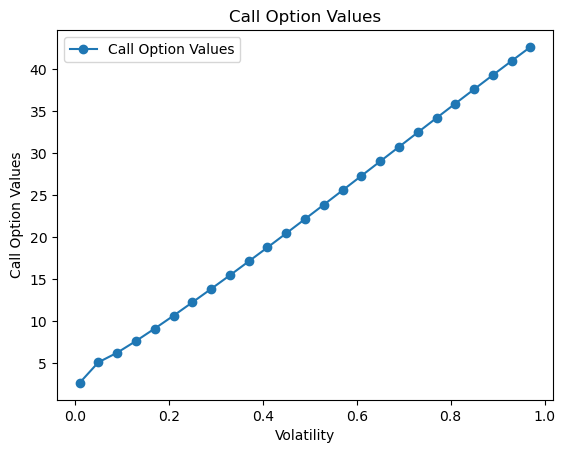

In [5]:
plt.plot(vol_vec, V_vol, 'o-', label='Call Option Values')
plt.title('Call Option Values')
plt.xlabel('Volatility')
plt.ylabel('Call Option Values')
plt.legend()
plt.show()

In [6]:
step_vec = np.arange(1,31)
V_tstep = []
for i in range(len(step_vec)):
    Value = binomial_option(spot, strike, rate, sigma, time, step_vec[i], output=2)[0,0]
    V_tstep.append(Value)

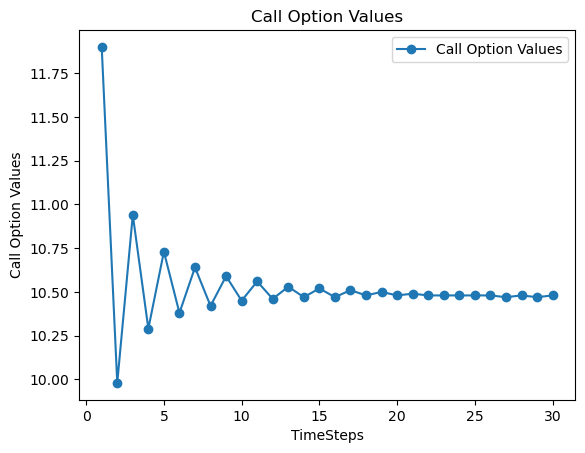

In [7]:
plt.plot(step_vec, V_tstep, 'o-', label='Call Option Values')
plt.title('Call Option Values')
plt.xlabel('TimeSteps')
plt.ylabel('Call Option Values')
plt.legend()
plt.show()

# B. Portfolio Optimisation

## Covariance Matrix

In [13]:
mu_vec = np.array([0.04, 0.08, 0.12, 0.15]).reshape(4,1)
sigma_vec = np.array([0.07, 0.12, 0.18, 0.26]).reshape(4,1)
corr_mat = np.array([[1, 0.2, 0.5, 0.3], 
                     [0.2, 1, 0.7, 0.4],
                     [0.5, 0.7, 1, 0.9],
                     [0.3, 0.4, 0.9, 1]])
m = 0.1

Covariance Matrix:
$$\Sigma = \sigma^T \rho\sigma$$

In [14]:
cov_mat = sigma_vec * corr_mat * sigma_vec.reshape(1,4)
cov_mat

array([[0.0049 , 0.00168, 0.0063 , 0.00546],
       [0.00168, 0.0144 , 0.01512, 0.01248],
       [0.0063 , 0.01512, 0.0324 , 0.04212],
       [0.00546, 0.01248, 0.04212, 0.0676 ]])

## Optimisation - Tangency Portfolio

### Solve optimization by Lagrangian method.

The Objective: $$\mathop{Min}\limits_{\text{w}}\dfrac{1}{2}\text{w}^T\Sigma w$$
Subject to constraints: $$\text{w}^T\textbf{1}=1$$
$$\text{w}^T\mu=0.1$$

$L=\dfrac{1}{2}w'\Sigma w+\lambda(m-w'\mu)+\gamma(1-w'\textbf{1})\\
\dfrac{\partial L}{\partial w}=\Sigma w+\lambda\mu+\gamma \textbf{1}$

Set: $\Sigma \hat w+\lambda\mu+\gamma \textbf{1}=0$

$\Rightarrow \hat w=\Sigma^{-1}(\lambda\mu+\gamma\textbf{1})$

$\dfrac{\partial^2 L}{\partial w^2}=\dfrac{\partial}{\partial w}(\Sigma w-\lambda\mu-\gamma\textbf{1})=\Sigma>0$

Plug $w$ to the constaints:

$\mu'\Sigma^{-1}(\lambda\mu+\gamma\textbf{1})=\lambda\mu'\Sigma^{-1}\mu+\gamma\mu'\Sigma^{-1}\textbf{1}=m$

$\textbf{1}'\Sigma^{-1}(\lambda\mu+\gamma\textbf{1})=\lambda\textbf{1}\Sigma^{-1}\mu+\gamma\textbf{1}'\Sigma^{-1}\textbf{1}=1$

We define the following scalars:

$\begin{cases} A=\textbf{1}'\Sigma^{-1}\textbf{1}\\B=\mu'\Sigma^{-1}\textbf{1}=\textbf{1}'\Sigma^{-1}\mu\\C=\mu'\Sigma^{-1}\mu \end{cases}$

$AC-B^2>0$

$\begin{cases} C\lambda+B\gamma=m\\B\lambda+A\gamma=1 \end{cases}$

$\Rightarrow \begin{cases} \lambda=\dfrac{Am-B}{AC-B^2}\\\gamma=\dfrac{C-Bm}{AC-B^2} \end{cases}$

$\hat w = \dfrac{1}{AC-B^2}\Sigma^{-1}[(A\mu-B\textbf{1})m+(C\textbf{1}-B\mu)]$

### Standard deviation of optimal portfolio.

In [15]:
one_vec = np.array([1, 1, 1, 1]).reshape(4,1)

In [16]:
A = one_vec.reshape(1,4)@np.linalg.inv(cov_mat)@one_vec
B = one_vec.reshape(1,4)@np.linalg.inv(cov_mat)@mu_vec
C = mu_vec.reshape(1,4)@np.linalg.inv(cov_mat)@mu_vec

In [17]:
Lambda = (A*m-B)/(A*C-B**2)
Gamma = (C-B*m)/(A*C-B**2)

In [257]:
w_hat = np.round(np.linalg.inv(cov_mat)@(Lambda*mu_vec+Gamma*one_vec),4)
print('===================================')
print('The Weights of Optimal Portfolio:')
print(w_hat)
print('===================================')

The Weights of Optimal Portfolio:
[[ 0.0587]
 [ 0.759 ]
 [-0.3195]
 [ 0.5018]]


$$\sigma_{\pi}^2(m)=\dfrac{Am^2-2Bm+C}{AC-B^2}$$

$$\sigma_{\pi}^2=w'\Sigma w$$

In [263]:
sigma_m = np.round(np.sqrt((A*m**2-2*B*m+C)/(A*C-B**2)),4)
print('===============================================')
print('The Volatility of Optimal Portfolio:', sigma_m)
print('===============================================')

The Volatility of Optimal Portfolio: [[0.1325]]


In [262]:
sigma_mv = np.round(np.sqrt(w_hat.reshape(1,4)@cov_mat@w_hat),4)
print('===============================================')
print('The Volatility of Optimal Portfolio:', sigma_mv)
print('===============================================')

The Volatility of Optimal Portfolio: [[0.1325]]


In [267]:
mu_m = np.round(w_hat.reshape(1,4)@mu_vec,4)
print('========================================')
print('The Return of Optimal Portfolio:', mu_m)
print('========================================')

The Return of Optimal Portfolio: [[0.1]]


In [269]:
Sharpe_Ratio = np.round(mu_m/sigma_m,4)
print('=================================================')
print('The Sharpe Ratio of Optimal Portfolio:', Sharpe_Ratio)
print('=================================================')

The Sharpe Ratio of Optimal Portfolio: [[0.7547]]


### On a graph identifying this optimal portfolio.

In [23]:
def portfolio_simulation(mu_vec,cov_mat,numofportfolio):

    # Initialize the lists
    rets = []; vols = []; wts = []

    # Simulate 5,000 portfolios
    for i in range(numofportfolio):

        # Generate random weights
        weights = (2*(random.random(len(mu_vec)))-1)[:, newaxis]

        # Set weights such that sum of weights equals 1
        weights /= np.sum(weights)
        
        rets.append((weights.T @ mu_vec)[:, newaxis])
        vols.append(sqrt(multi_dot([weights.T, cov_mat, weights])))
        wts.append(weights.flatten())

    # Create a dataframe for analysis
    portdf = pd.DataFrame({
        'port_rets': array(rets).flatten(),
        'port_vols': array(vols).flatten(),
        'weights': list(array(wts))
    })
    
    portdf['sharpe_ratio'] = portdf['port_rets'] / portdf['port_vols']

    return round(portdf,2)

In [24]:
# Create a dataframe for analysis
numofportfolio = 5000
numofasset = len(mu_vec)
temp = portfolio_simulation(mu_vec,cov_mat,numofportfolio)
temp

,port_rets,port_vols,weights,sharpe_ratio
0,0.41,1.03,"[-0.5978535980496537, -3.1958738608865986, 0.9...",0.40
1,0.11,0.16,"[0.15096477059271765, 0.17734367177554344, 0.3...",0.69
2,0.11,0.15,"[0.12428963960293983, 0.37792423984527285, 0.0...",0.71
3,0.17,0.29,"[-1.259816940916555, 1.1311150899064435, 1.169...",0.61
4,0.07,0.10,"[0.3442371420483194, 0.4612092424008677, 0.291...",0.75
...,...,...,...,...
4995,0.19,0.73,"[2.117405575158758, -3.2231796840271603, -1.41...",0.25
4996,0.07,0.14,"[0.8591620734786002, -0.6244988011673591, 0.80...",0.54
4997,0.01,0.14,"[0.8351521663855488, 0.4907262490675793, 0.386...",0.09
4998,0.10,0.15,"[0.5010079655063576, -0.15093768735108729, 0.3...",0.65


In [25]:
# Verify the above result
temp.describe().T

,count,mean,std,min,25%,50%,75%,max
port_rets,5000.0,0.124500,1.580056,-28.45,0.05,0.10,0.14,86.79
port_vols,5000.0,0.680162,4.344617,0.03,0.13,0.20,0.36,220.97
sharpe_ratio,5000.0,0.457404,0.326832,-0.49,0.34,0.57,0.68,1.26


In [26]:
# Import optimization module from scipy
import scipy.optimize as sco

In [27]:
# Define portfolio stats function
def portfolio_stats(weights):
    
    weights = array(weights)[:,newaxis]
    port_rets = (weights.T @ mu_vec)[:, newaxis]
    port_vols = sqrt(multi_dot([weights.T, cov_mat, weights]))
    
    return array([port_rets, port_vols, port_rets/port_vols]).flatten()

In [28]:
def min_volatility(weights):
    return portfolio_stats(weights)[1]

In [29]:
# Define initial weights
initial_wts = numofasset * [1./numofasset]
initial_wts

[0.25, 0.25, 0.25, 0.25]

In [30]:
# Each asset boundary ranges from 0 to 1 bounds
bnds = tuple((-1,1) for x in range(numofasset))
bnds

((-1, 1), (-1, 1), (-1, 1), (-1, 1))

In [31]:
# Efficient frontier params
targetrets = linspace(-0.02,0.20,1000)
tvols = []

for tr in targetrets:
    
    ef_cons = ({'type': 'eq', 'fun': lambda x: portfolio_stats(x)[0] - tr},
               {'type': 'eq', 'fun': lambda x: sum(x) - 1})
    
    opt_ef = sco.minimize(min_volatility, initial_wts, method='SLSQP', bounds=bnds, constraints=ef_cons)
    
    tvols.append(opt_ef['fun'])

targetvols = array(tvols)

In [32]:
# Dataframe for EF
efport = pd.DataFrame({
    'targetrets' : around(targetrets[14:],2),
    'targetvols': around(targetvols[14:],2),
    'targetsharpe': around(targetrets[14:]/targetvols[14:],2)
})

In [35]:
import plotly.graph_objects as go

fig = go.Figure()

# Plot simulated portfolio
fig = px.scatter(
    temp, x='port_vols', y='port_rets', color='sharpe_ratio', 
    labels={'port_vols': 'Expected Volatility', 'port_rets': 'Expected Return','sharpe_ratio': 'Sharpe Ratio'},
    title="Mean-Variance of Portfolio"
     ).update_traces(mode='markers', marker=dict(symbol='cross'))

# Plot Efficient Frontier
fig.add_trace(
    go.Line(
        x=targetvols,
        y=targetrets,
        name = 'Efficient Frontier'
    )).update_traces(line_color='Red', line_width=5)

# Plot Optimal Portfolio 
fig.add_scatter(
    mode='markers', 
    x=[0.1325], 
    y=[0.10], 
    marker=dict(color='Green', size=20, symbol='star'),
    name = 'Optimal Portfolio').update(layout_showlegend=False)

fig.show()

## Optimisation - Global Minimum Variance Portfolio

### Solve optimization by Lagrangian method.

The Objective: $$\mathop{Min}\limits_{\text{w}}\dfrac{1}{2}\text{w}^T\Sigma w$$

Subject to constraints: $$\text{w}^T\textbf{1}=1$$

$L=\dfrac{1}{2}w'\Sigma w+\gamma(1-w\mathbf{1})\\
\dfrac{\partial L}{\partial w}=\Sigma w+\gamma\mathbf{1}$

Set: $\Sigma \hat w+\gamma\mathbf{1}=0$

$\Rightarrow \hat w=\Sigma^{-1}(-\gamma\mathbf{1})$

<!-- $\dfrac{\partial^2 L}{\partial w^2}=\dfrac{\partial}{\partial w}(\Sigma w-\lambda\mu)=\Sigma>0$ -->

Plug $w$ to the constaints:

<!-- $\mu'\Sigma^{-1}(\lambda\mu+\gamma\textbf{1})=\lambda\mu'\Sigma^{-1}\mu+\gamma\mu'\Sigma^{-1}\textbf{1}=m$ -->

$\textbf{1}'\Sigma^{-1}(-\gamma\textbf{1})=1$

<!-- We define the following scalars:

$\begin{cases} A=\textbf{1}'\Sigma^{-1}\textbf{1}\\B=\mu'\Sigma^{-1}\textbf{1}=\textbf{1}'\Sigma^{-1}\mu\\C=\mu'\Sigma^{-1}\mu \end{cases}$

$AC-B^2>0$
 -->
<!-- $\begin{cases} C\lambda+B\gamma=m\\B\lambda+A\gamma=1 \end{cases}$ -->

$\gamma=-\dfrac{1}{\mathbf{1}'\Sigma^{-1}\mathbf{1}}$

$\hat w = \dfrac{1}{AC-B^2}\Sigma^{-1}[(A\mu-B\textbf{1})m+(C\textbf{1}-B\mu)]$

In [281]:
Gamma_g = np.round((-1)/(one_vec.reshape(1,4)@np.linalg.inv(cov_mat)@one_vec),4)
print('====================================================')
print('The Gamma of Minimum Variance Portfolio:', Gamma_g)
print('====================================================')

The Gamma of Minimum Variance Portfolio: [[-0.0007]]


In [276]:
wg_hat = np.round(np.linalg.inv(cov_mat)@(-Gamma_g*one_vec),4)
print('=========================================')
print('The Return of Minimum Variance Portfolio:')
print(wg_hat)
print('=========================================')

The Return of Minimum Variance Portfolio:
[[ 0.9054]
 [ 0.8291]
 [-1.3746]
 [ 0.6401]]


### The return and standard deviation of optimal portfolio.

In [282]:
mu_g = np.round(wg_hat.T@mu_vec,4)
print('====================================================')
print('The Return of Minimum Variance Portfolio:', mu_g)
print('====================================================')

The Return of Minimum Variance Portfolio: [[0.0336]]


In [283]:
sigma_g = np.round(np.sqrt(wg_hat.reshape(1,4)@cov_mat@wg_hat),4)
print('========================================================')
print('The Volatility of Minimum Variance Portfolio:', sigma_g)
print('========================================================')

The Volatility of Minimum Variance Portfolio: [[0.0258]]


### On a graph identifying and name this optimal portfolio.

In [43]:
# Plot simulated portfolio
fig = px.scatter(
    temp, x='port_vols', y='port_rets', color='sharpe_ratio', 
    labels={'port_vols': 'Expected Volatility', 'port_rets': 'Expected Return','sharpe_ratio': 'Sharpe Ratio'},
    title="Mean-Variance of Portfolio"
     ).update_traces(mode='markers', marker=dict(symbol='cross'))

# Plot Efficient Frontier
fig.add_trace(
    go.Line(
        x=targetvols,
        y=targetrets,
        name = 'Efficient Frontier'
    )).update_traces(line_color='Red', line_width=5)

# Plot Optimal Portfolio 
fig.add_scatter(
    mode='markers', 
    x=[0.1325], 
    y=[0.10], 
    marker=dict(color='Green', size=20, symbol='star'),
    name = 'Optimal Portfolio').update(layout_showlegend=False)

# Plot Optimal Portfolio 
fig.add_scatter(
    mode='markers', 
    x=[0.0258], 
    y=[0.0336], 
    marker=dict(color='Blue', size=20, symbol='star'),
    name = 'Minimum Variance Portfolio').update(layout_showlegend=False)

fig.show()

# C. Empirical Value at Risk

## Calculate the 99%/10day VaR using a sample standard deviation.

In [542]:
import math
from scipy.stats import norm

# Load locally stored data
data = pd.read_excel('/Users/antoneyoung/Jupyter Notebook/CQF Python Lab/FTSE100.xlsx', index_col=0, parse_dates=True)

# Check values 
data.head()

,Closing Price
Date,
2009-07-22,4493.73
2009-07-23,4559.80
2009-07-24,4576.61
2009-07-27,4586.13
2009-07-28,4528.84


In [546]:
data['Returns'] = data.pct_change()
df = data.copy()
df = df.dropna()

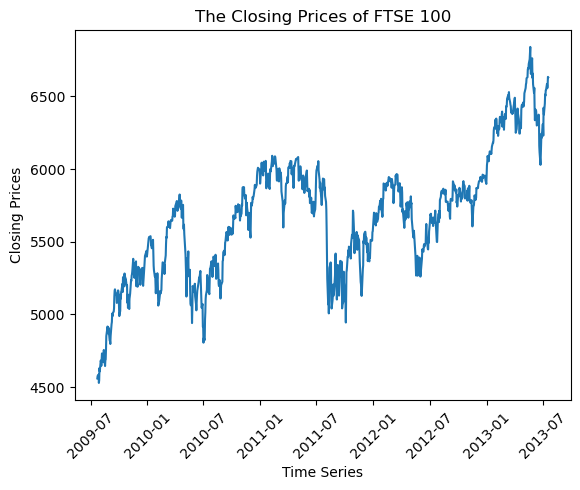

In [247]:
plt.plot(df.index, df['Closing Price'])
plt.xlabel('Time Series')
plt.ylabel('Closing Prices')
plt.title('The Closing Prices of FTSE 100')
plt.xticks(rotation=45)
plt.show()

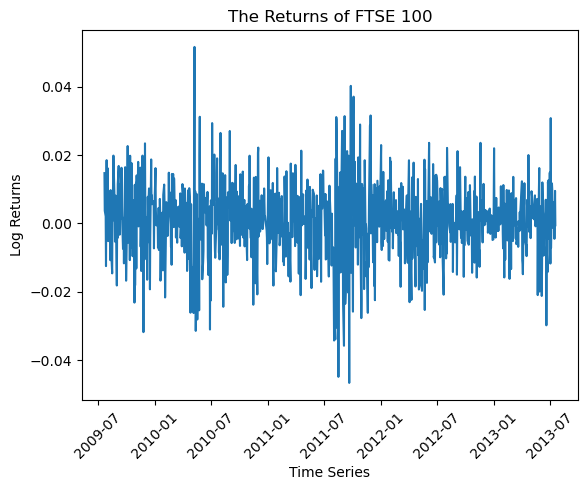

In [246]:
plt.plot(df['Returns'])
plt.xlabel('Time Series')
plt.ylabel('Log Returns')
plt.title('The Returns of FTSE 100')
plt.xticks(rotation=45)
plt.show()

### The rolling 21-day sample standard deviation.

In [451]:
sigma_21D = pd.Series(df['Returns']).rolling(window=21, center=False).std().dropna()

### 10-day volatility

In [443]:
sigma_10D = np.sqrt(10*sigma_21D**2)

### 99%/10-day VaR

In [454]:
mu_10D = np.mean(df['Returns'])*10
print('===================================================')
print('The Expected Return (10-day):', mu_10D)
print('===================================================')

The Expected Return (10-day): 0.0044473291971980815


In [455]:
VaR_1 = norm.ppf(1-0.99, mu_10D, sigma_10D)

## Calculate the 99%/10day VaR using a GARCH.

$\sigma^2=0.000001+0.047u_{t-1}^2+0.9466\sigma_{t-1}^2$

$h_t=\dfrac{\omega}{1-\beta}+\alpha(r_{t-1}-\mu)^2+\alpha\beta(r_{t-2}-\mu)^2+\alpha\beta^2(r_{t-3}-\mu)^2+\cdots$

In [457]:
omega, alpha, beta = 0.000001, 0.047, 0.9466

In [458]:
# GARCH(1,1) function
def garch(omega, alpha, beta, ret):
    
    var = []
    for i in range(len(ret)):
        if i==0:
            var.append(omega/np.abs(1-alpha-beta))
        else:
            var.append(omega + alpha * ret[i-1]**2 + beta * var[i-1])
            
    return np.array(var)

In [459]:
# Verifty variance values
var = garch(omega,alpha,beta,df['Returns'][-989:])
sigma_10d = np.sqrt(var[-988:]*10)
VaR_2 = norm.ppf(1-0.99, mu_10D, sigma_10d)

## The percentage of VaR breaches for both measures

In [572]:
realised_return = []

for i in range(len(data)-10):
    i_1 = i + 10
    returns = np.log(data['Closing Price'][i_1]/data['Closing Price'][i])
    realised_return.append(returns)

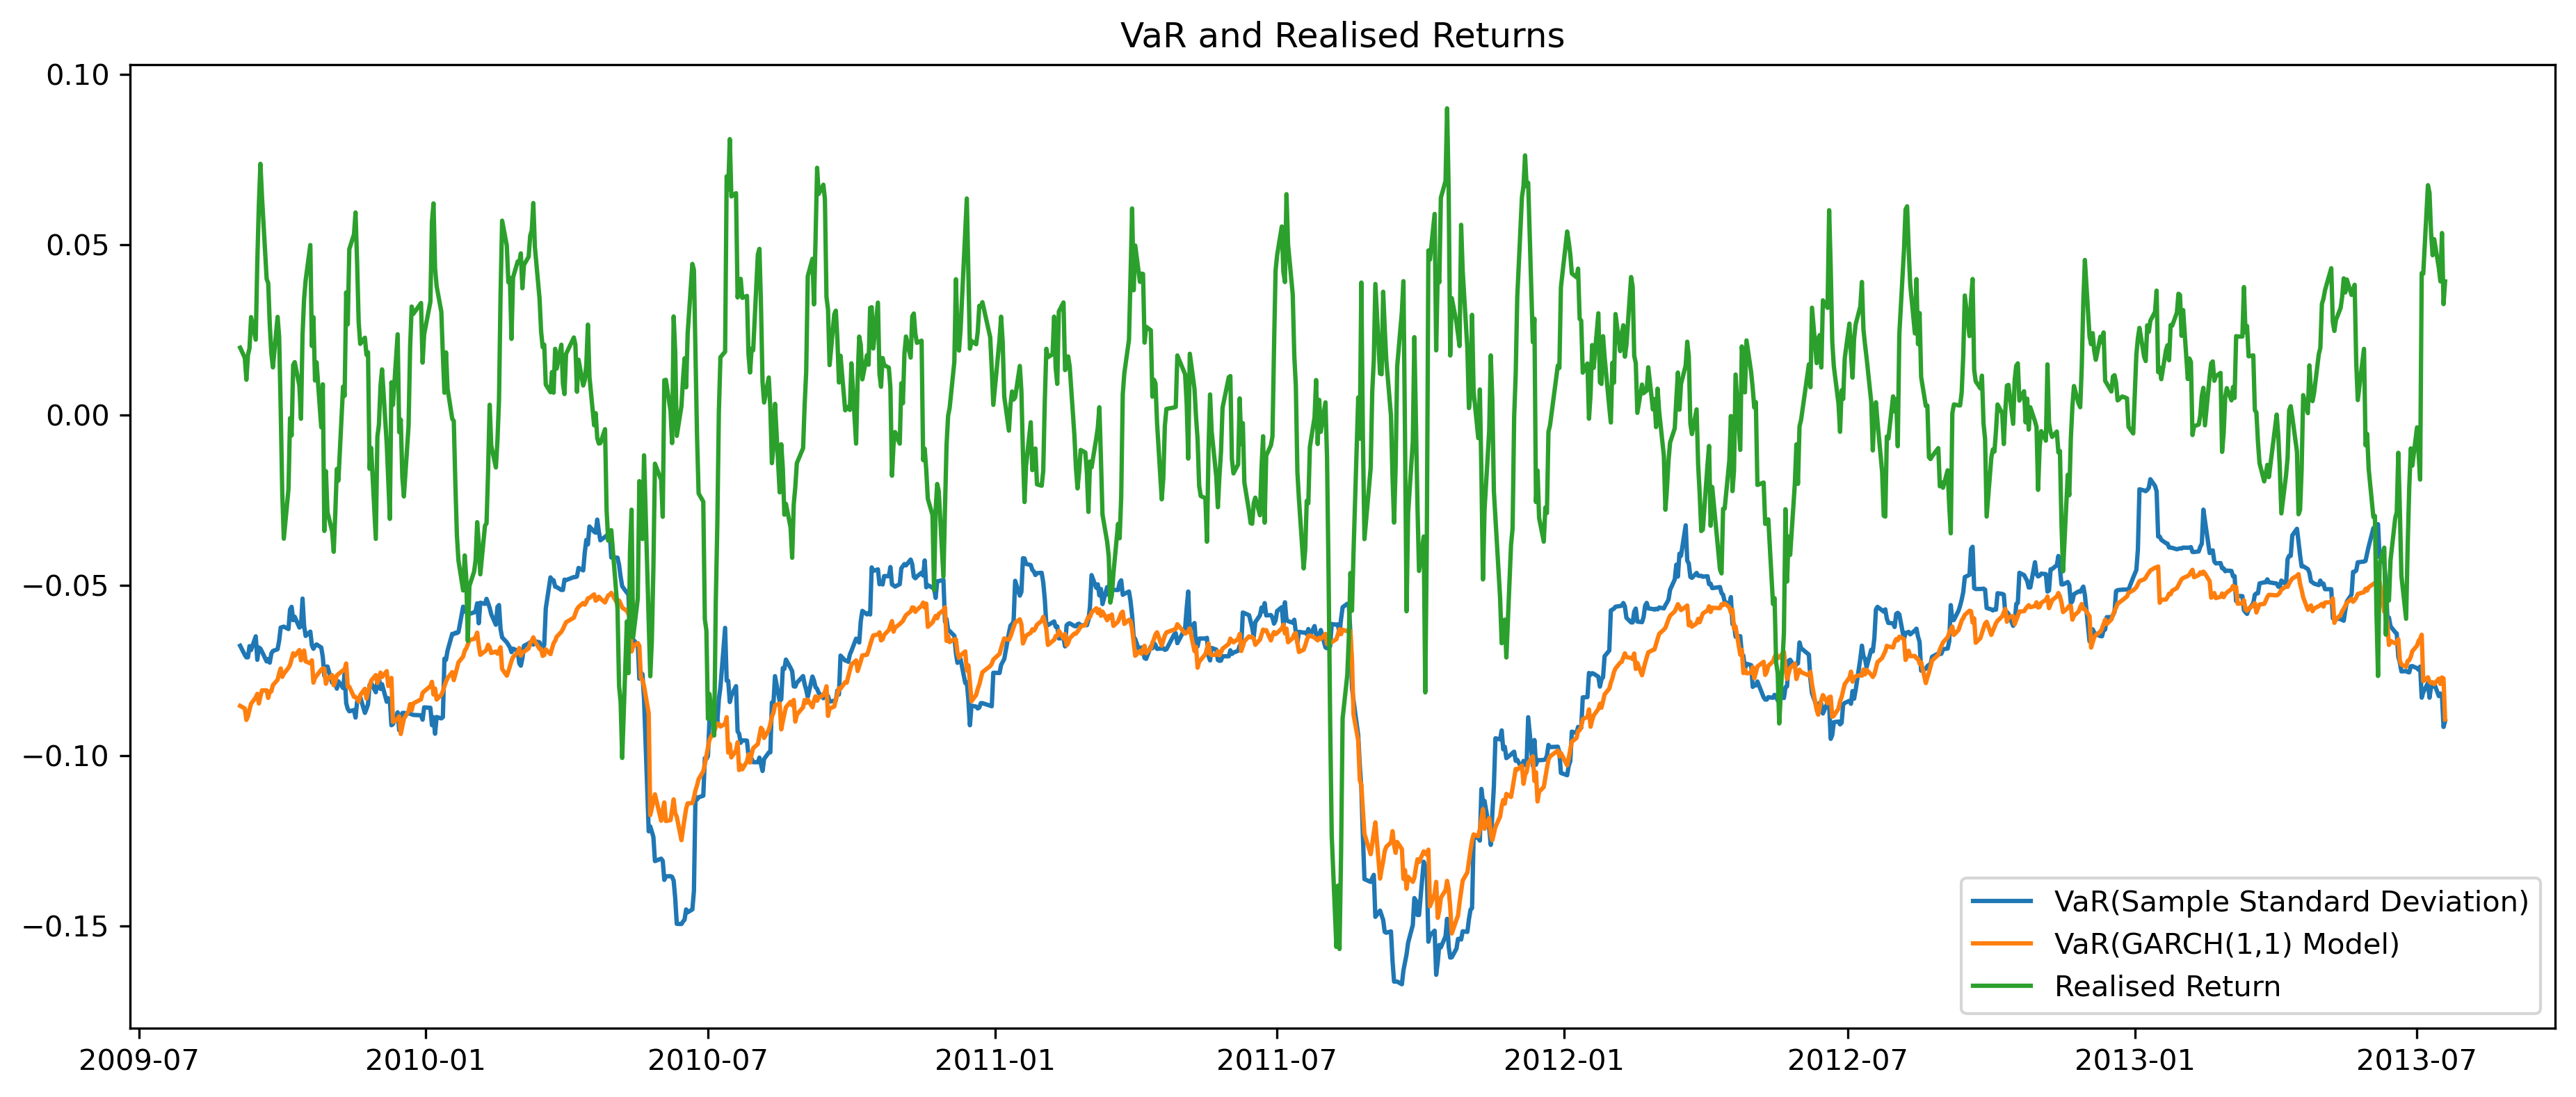

In [581]:
plt.figure(dpi=300, figsize=(15,6))
plt.plot(df[-978:].index, VaR_1[-988:-10], label='VaR(Sample Standard Deviation)')
plt.plot(df[-978:].index, VaR_2[-988:-10], label='VaR(GARCH(1,1) Model)')
plt.plot(df[-978:].index, realised_return[-978:], label='Realised Return')
# plt.xticks(rotation=45)
plt.title('VaR and Realised Returns')
plt.legend()
plt.show()

In [576]:
percentage1 = np.round(sum(realised_return[-978:]<VaR_1[:-10])/len(realised_return[-978:]),4)
print('==================================')
print('The percentage of breaches:', percentage1)
print('==================================')

The percentage of breaches: 0.0276


In [577]:
percentage2 = np.round(sum(realised_return[-978:]<VaR_2[:-10])/len(realised_return[-978:]),4)
print('==================================')
print('The percentage of breaches:', percentage2)
print('==================================')

The percentage of breaches: 0.0225


**<center><font face="Times New Roman" size=6>END<center>**